<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_10__Convnet_visualization_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights = 'imagenet')

In [18]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [19]:
img_path = './bird.png'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [20]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted: [('n01530575', 'brambling', 0.76026535), ('n01807496', 'partridge', 0.0603762), ('n01806567', 'quail', 0.053473927)]


In [21]:
np.argmax(preds[0])

10

In [22]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [23]:
from keras import backend as K

In [25]:
bird_output = model.output[:,10]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(bird_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis = (0,1,2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis = -1)

In [27]:
import matplotlib.pyplot as plt

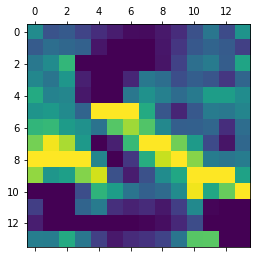

In [28]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap, 0)
plt.matshow(heatmap) 

In [29]:
import cv2

In [33]:
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

In [35]:
cv2.imwrite('./what_bird.png', superimposed_img)

True

In [36]:
superimposed_img

array([[[295.8, 357. , 316.6],
        [295.8, 357. , 316.6],
        [295.8, 357. , 316.6],
        ...,
        [308.6, 357. , 303.8],
        [308.6, 357. , 303.8],
        [308.6, 357. , 303.8]],

       [[ 73.8, 201. , 143.6],
        [ 78.8, 201. , 143.6],
        [ 77.8, 201. , 143.6],
        ...,
        [110.6, 258. , 181.8],
        [117.6, 258. , 184.8],
        [115.6, 258. , 183.8]],

       [[ 78.8, 201. , 143.6],
        [ 77.8, 201. , 139.6],
        [ 75.8, 201. , 140.6],
        ...,
        [110.6, 258. , 180.8],
        [117.6, 258. , 184.8],
        [115.6, 258. , 183.8]],

       ...,

       [[267. , 349. , 334.4],
        [271. , 349. , 333.4],
        [271. , 350. , 333.4],
        ...,
        [272.2, 219. , 221. ],
        [263.2, 216. , 218. ],
        [264.2, 217. , 218. ]],

       [[267. , 349. , 329.4],
        [267. , 349. , 334.4],
        [270. , 352. , 333.4],
        ...,
        [269.2, 215. , 220. ],
        [266.2, 214. , 216. ],
        [265.2,

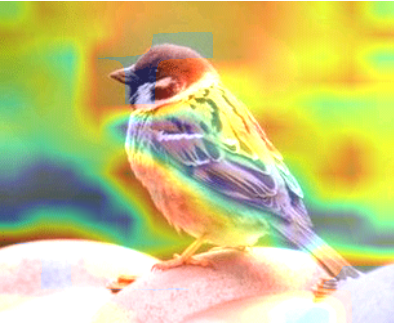

In [37]:
from IPython.display import Image, display
display(Image('./what_bird.png'))